## Day 1 Exercises

In [60]:
import pandas as pd
import numpy as np
import pydataset
import acquire
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

### 1. ) Use a python module containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.


In [2]:
df_iris = pd.DataFrame(pydataset.data('iris'))

Print the first 3 rows:

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


Print the number of rows and columns:

In [4]:
df_iris.shape

(150, 5)

Print the column names:

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Print the data type of each column:

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics? Yes, because sepal length and width are proportionally much larger than petal length and petal width.

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. ) Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', index_col=0) 

Assign the first 100 rows to a new dataframe, df_excel_sample:

In [9]:
df_excel_sample = df_excel.head(100)

Print the number of rows of your original dataframe:

In [10]:
df_excel.shape

(7049, 11)

Print the first 5 column names:

In [11]:
df_excel.columns

Index(['gender', 'is_senior_citizen', 'partner', 'dependents', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

Print the column names that have a data type of object:

In [12]:
pd.Series(df_excel.select_dtypes(object).columns)

0          gender
1         partner
2      dependents
3    payment_type
4           churn
dtype: object

Compute the range for each of the numeric variables.:

In [13]:
mins_and_maxes = pd.DataFrame({'Minimum': df_excel.select_dtypes([int,float]).min(),
              'Maximum': df_excel.select_dtypes([int,float]).max()})

In [14]:
mins_and_maxes

,Minimum,Maximum
is_senior_citizen,0.00,1.00
phone_service,0.00,2.00
internet_service,0.00,2.00
contract_type,0.00,2.00
monthly_charges,18.25,118.75
total_charges,18.80,8684.80


### 3. ) Read the data from this google sheet into a dataframe, df_google

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_googlesheet = pd.read_csv(csv_export_url)

Print the first 3 rows:

In [16]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Print the number of rows and columns:

In [17]:
df_googlesheet.shape

(891, 12)

Print the column names:

In [18]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Print the data type of each column:

In [19]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Print the summary statistics for each of the numeric variables:

In [20]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Print the unique values for each of your categorical variables:

In [21]:
print('Survived:', df_googlesheet.Survived.unique())
print('Pclass:', df_googlesheet.Pclass.unique())
print('Sex:', df_googlesheet.Sex.unique())
print('SibSp:', df_googlesheet.SibSp.unique())
print('Embarked:', df_googlesheet.Embarked.unique())

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Embarked: ['S' 'C' 'Q' nan]


## Day 2 Exercises

### 1. ) Iris Data

#### Use the function defined in acquire.py to load the iris data.

In [22]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### Drop the species_id and measurement_id columns.

In [23]:
iris.drop(columns=['species_id', 'measurement_id'], inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Rename the species_name column to just species.

In [24]:
iris.rename(columns={'species_name':'species'}, inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

The inverse_tranform method transforms labels back to original encoding. This would be useful in presenting data and charting data. 

In [25]:
# Assign a variable to the encoder
int_encoder = LabelEncoder()
# Fit the encoder to our species column from our train data
int_encoder.fit(iris.species)
# Transform the data and save over the old
iris.species = int_encoder.transform(iris.species)

#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [26]:
def prep_iris(iris):
    int_encoder = LabelEncoder()
    int_encoder.fit(iris.species)
    iris.species = int_encoder.transform(iris.species)
    return iris

### 2. ) Titanic Data

#### Use the function you defined in acquire.py to load the titanic data set.

In [27]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


#### Handle the missing values in the embark_town and embarked columns.

In [28]:
# Check how many missing values are in each column
titanic.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [29]:
# Fill empty cells with Nan
titanic.fillna(np.nan, inplace=True)

In [30]:
# Fill in missing values in embarked and embark_town with mode imputer

In [31]:
# Split data into train and test. We must split our data before using an imputer.
train, test = train_test_split(titanic, train_size=.7, random_state=123)

In [32]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
train['embarked'] = imputer_mode.fit_transform(train[['embarked']])
train['embark_town'] = imputer_mode.fit_transform(train[['embark_town']])
# Do the same for test data in case there are any nulls
test['embarked'] = imputer_mode.fit_transform(test[['embarked']])
test['embark_town'] = imputer_mode.fit_transform(test[['embark_town']])

In [33]:
# Check train for missing values
train.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             131
sibsp             0
parch             0
fare              0
embarked          0
class             0
deck            482
embark_town       0
alone             0
dtype: int64

In [34]:
# Check test for missing values
test.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age              46
sibsp             0
parch             0
fare              0
embarked          0
class             0
deck            206
embark_town       0
alone             0
dtype: int64

#### Remove the deck column.

In [35]:
train.drop(columns=['deck'], inplace = True)
test.drop(columns=['deck'], inplace = True)

In [36]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
416,416,1,2,female,34.0,1,1,32.5000,S,Second,Southampton,0
801,801,1,2,female,31.0,1,1,26.2500,S,Second,Southampton,0
512,512,1,1,male,36.0,0,0,26.2875,S,First,Southampton,1
455,455,1,3,male,29.0,0,0,7.8958,C,Third,Cherbourg,1
757,757,0,2,male,18.0,0,0,11.5000,S,Second,Southampton,1


In [37]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
172,172,1,3,female,1.0,1,1,11.1333,S,Third,Southampton,0
524,524,0,3,male,NaN,0,0,7.2292,C,Third,Cherbourg,1
452,452,0,1,male,30.0,0,0,27.7500,C,First,Cherbourg,1
170,170,0,1,male,61.0,0,0,33.5000,S,First,Southampton,1
620,620,0,3,male,27.0,1,0,14.4542,C,Third,Cherbourg,0


#### Use a label encoder to transform the embarked column.

In [38]:
# Assign a variable to the encoder
train_int_encoder = LabelEncoder()
# Fit the encoder to our embarked column from our train data
train_int_encoder.fit(train[['embarked']])
# Transform the data and save over the old
train.embarked = train_int_encoder.transform(train.embarked)
# Preview the column. Embark town is now integers that represent the original embarkment locations

In [39]:
# Values are now 2, 0, or 1
train.embarked.value_counts()

2    457
0    109
1     57
Name: embarked, dtype: int64

#### Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

Scaling is beneficial when you have features that vary greatly in magnitude. It prevents the algorithm from discriminating on size. You won't need to do this when your features are similar in size or use the same units. You also wouldn't want to use scaled data in charts. 

In [40]:
# Handle nulls in age
imp_median = SimpleImputer(missing_values=np.nan, strategy = 'median')
train['age'] = imp_median.fit_transform(train[['age']])
# Assign MinMaxScaler to a variable
scaler = MinMaxScaler()

In [41]:
# Scale age
train['age'] =scaler.fit_transform(train[['age']])

In [42]:
# Scale fare
train['fare'] = scaler.fit_transform(train[['fare']])

In [43]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
416,416,1,2,female,0.421965,1,1,0.063436,2,Second,Southampton,0
801,801,1,2,female,0.384267,1,1,0.051237,2,Second,Southampton,0
512,512,1,1,male,0.447097,0,0,0.051310,2,First,Southampton,1
455,455,1,3,male,0.359135,0,0,0.015412,0,Third,Cherbourg,1
757,757,0,2,male,0.220910,0,0,0.022447,2,Second,Southampton,1


#### Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [44]:
def prep_titanic(iris):
    int_encoder = LabelEncoder()
    int_encoder.fit(titanic.embark_town)
    titanic.embark_town = int_encoder.transform(titanic.embark_town)
    return titanic

## Day 3 Exercises

#### Split data into train (70%) & test (30%) samples

In [45]:
iris = acquire.get_iris_data()

In [46]:
iris.drop(columns=['species_id', 'measurement_id'], inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Split data into train and test. We must split our data before using an imputer.
iris_train, iris_test = train_test_split(iris, train_size=.7, random_state=123)

In [48]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
114,5.8,2.8,5.1,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
53,5.5,2.3,4.0,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
38,4.4,3.0,1.3,0.2,setosa


#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

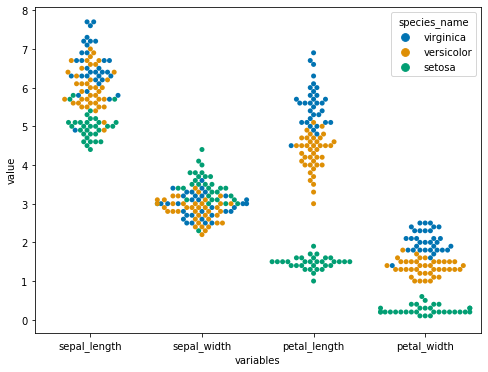

In [49]:
# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species_name']], 'species_name',var_name="variables")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="variables", y="value", hue = 'species_name', palette="colorblind", data=df_melt)

Takeaway: petal length and petal width are great ways to distinguish between species. Sepal width is the least useful feature.

#### Create 4 subplots (2 rows x 2 columns) of scatterplots
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

In [50]:
# create sepal_area and petal_area features
iris_train['sepal_area'] = iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area'] = iris_train['petal_length'] * iris_train['petal_width']

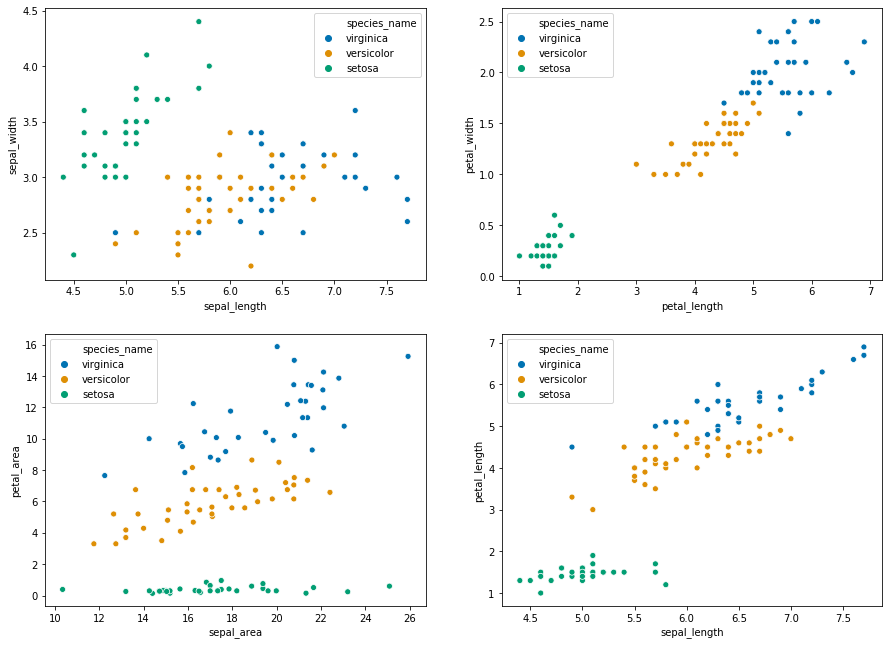

In [51]:
f, axes = plt.subplots(2, 2, figsize = (15,11))
sns.scatterplot(x= iris_train.sepal_length , y= iris_train.sepal_width, hue = iris_train.species_name, palette='colorblind', ax=axes[0, 0])
sns.scatterplot(x= iris_train.petal_length , y= iris_train.petal_width, hue = iris_train.species_name, palette='colorblind', ax=axes[0, 1])
sns.scatterplot(x= iris_train.sepal_area, y= iris_train.petal_area, hue = iris_train.species_name, palette='colorblind', ax=axes[1,0])
sns.scatterplot(x= iris_train.sepal_length , y= iris_train.petal_length, hue = iris_train.species_name, palette='colorblind', ax=axes[1, 1])

#### Create a heatmap of each variable layering correlation coefficient on top.

In [52]:
corr = iris_train.corr()

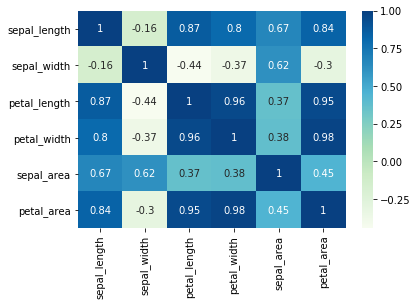

In [53]:
sns.heatmap(corr, annot = True, cmap = 'GnBu', cbar= True)

#### Create a scatter matrix visualizing the interaction of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d7f4eb8>,
      dtype=object)

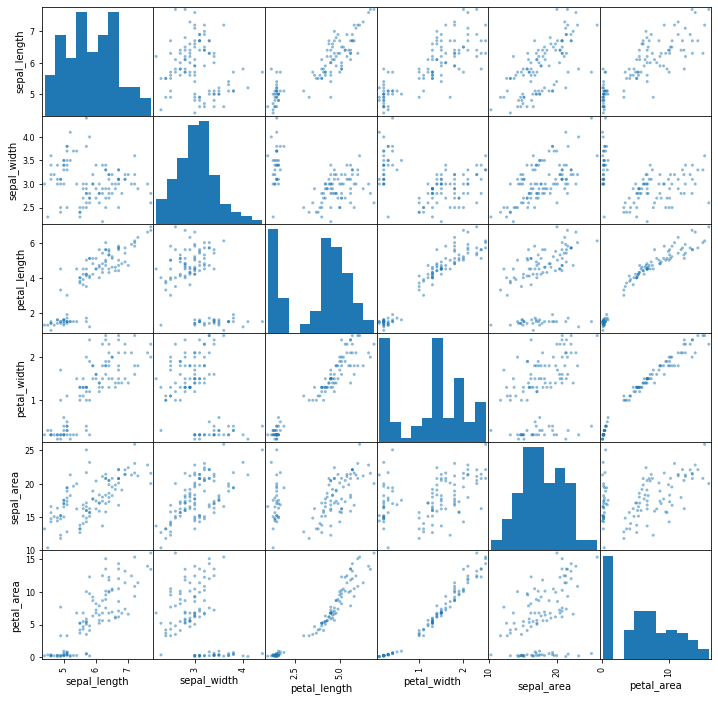

In [54]:
pd.plotting.scatter_matrix(iris_train.loc[:,:], figsize = (12,12))

#### Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.
- must include null hypothesis, alternative hypothesis, t-test, results, summary
- H0: the difference in sepal length between virginica and versicolor is insignificant.
- Ha: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.

Null hypothesis H0: The difference in sepal length between virginica and versicolor is insignificant.

Alternative Hypothesis Ha: The difference in sepal length between virginica and versicolor is significant.

Chi-Square Test to compare the two variables

In [56]:
observed = pd.crosstab(iris_train.sepal_length, iris_train.species_name)
observed

species_name,setosa,versicolor,virginica
sepal_length,,,
4.4,1,0,0
4.5,1,0,0
4.6,4,0,0
4.7,1,0,0
4.8,3,0,0
4.9,3,1,1
5.0,6,0,0
5.1,6,1,0
5.2,2,0,0
